# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Goal Of The Case Study

There are quite a few goals for this case study:


Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### EDA

#### Step 1 Load Data

In [2298]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2299]:
# import data
lead_df = pd.read_csv('Leads.csv')

In [2300]:
# check dataset
lead_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

##### Inspect the Data

Observation : Multiple values are not selected

In [2301]:
# data shape
lead_df.shape

(9240, 37)

In [2302]:
# datatype
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Note : We have missing value 

In [2303]:
# describe the dat.
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

#### Step 2 Data Cleaning

In [2304]:
# Treatment of not selected data.
lead_df = lead_df.replace('Select',np.nan)

In [2305]:
# verify
lead_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                      NaN                                NaN                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No             NaN     NaN                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                      NaN                                NaN                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No             NaN     NaN                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                                NaN                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

##### Missing Value Teatment

In [2306]:
# Checking for duplicates and dropping the entire duplicate row if any:-

lead_df.drop_duplicates(subset=None, inplace=True)

In [2307]:
# Checking for null values.
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [2308]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [2309]:
# dropping the columns with missing values greater than or equal to 39% .
lead_df=lead_df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','City',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [2310]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Observation: Still we have 5 columns which has huge null values.

In [2311]:
# check columns data 
lead_df.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [2312]:
lead_df.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [2313]:
# visualize data
def missing_data(cl_nm):
    plt.figure(figsize=(17,5))
    sns.histplot(cl_nm)
    plt.xticks(rotation=90)
    

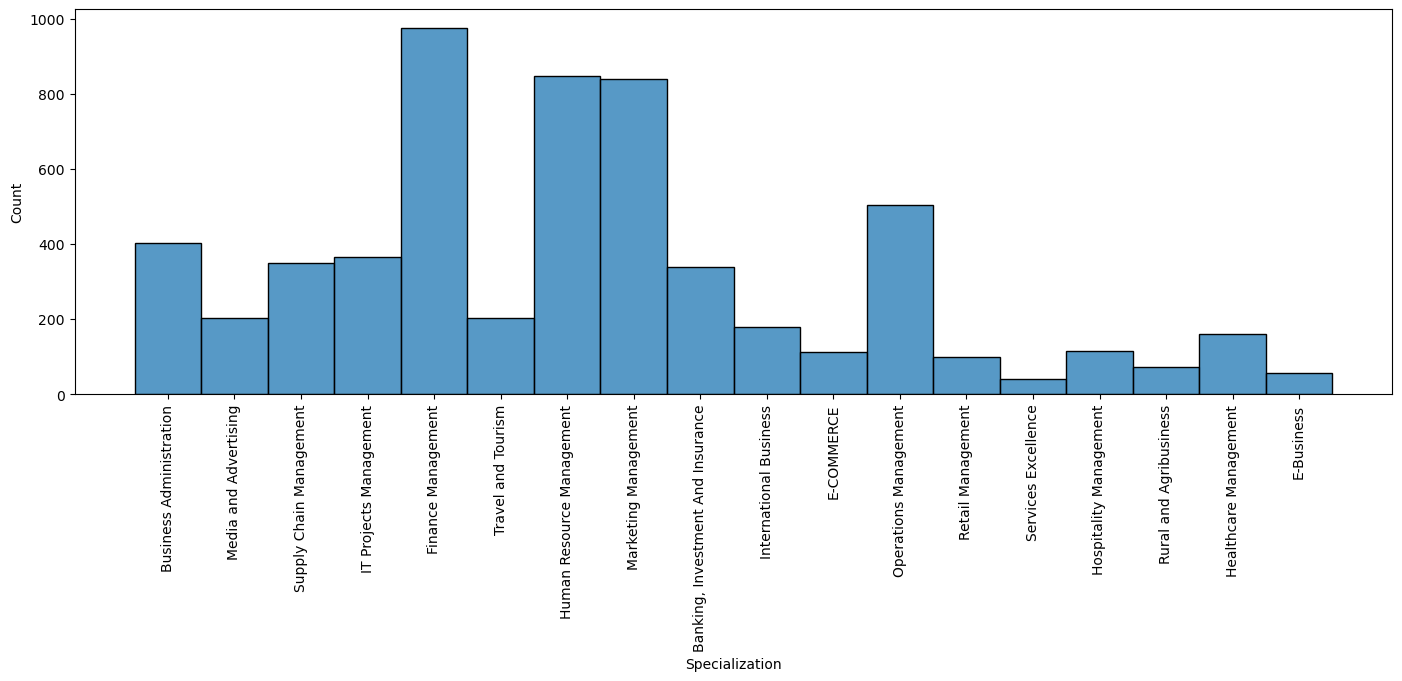

In [2314]:
missing_data(lead_df.Specialization)

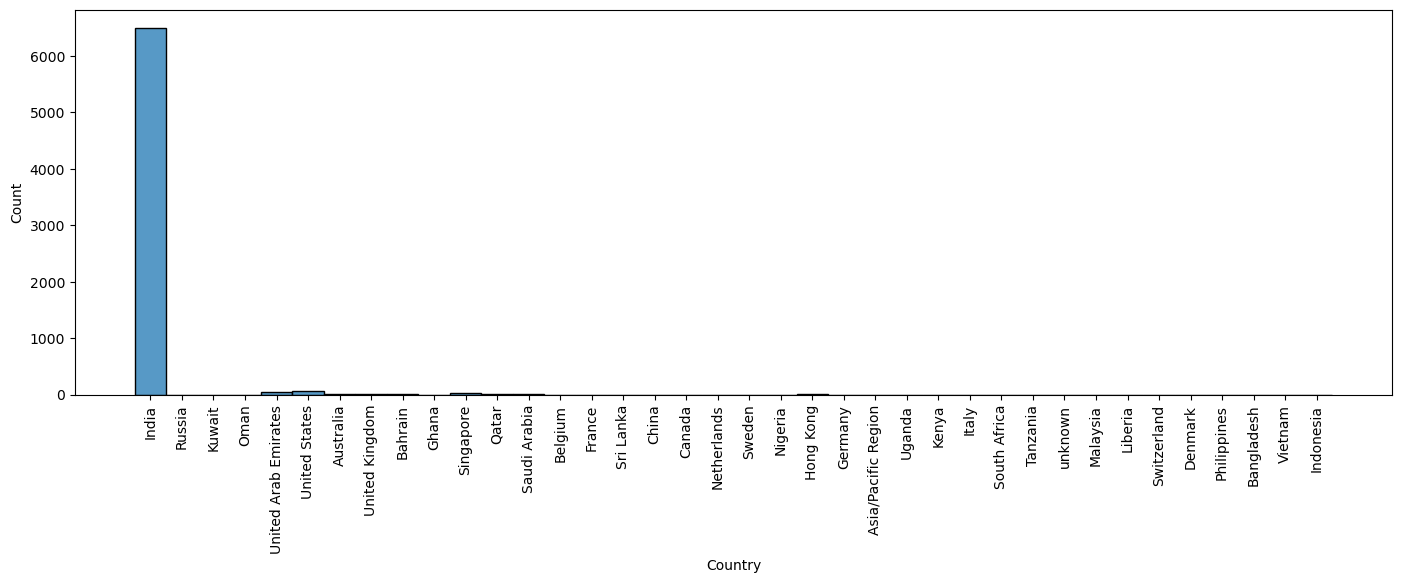

In [2315]:
missing_data(lead_df.Country)

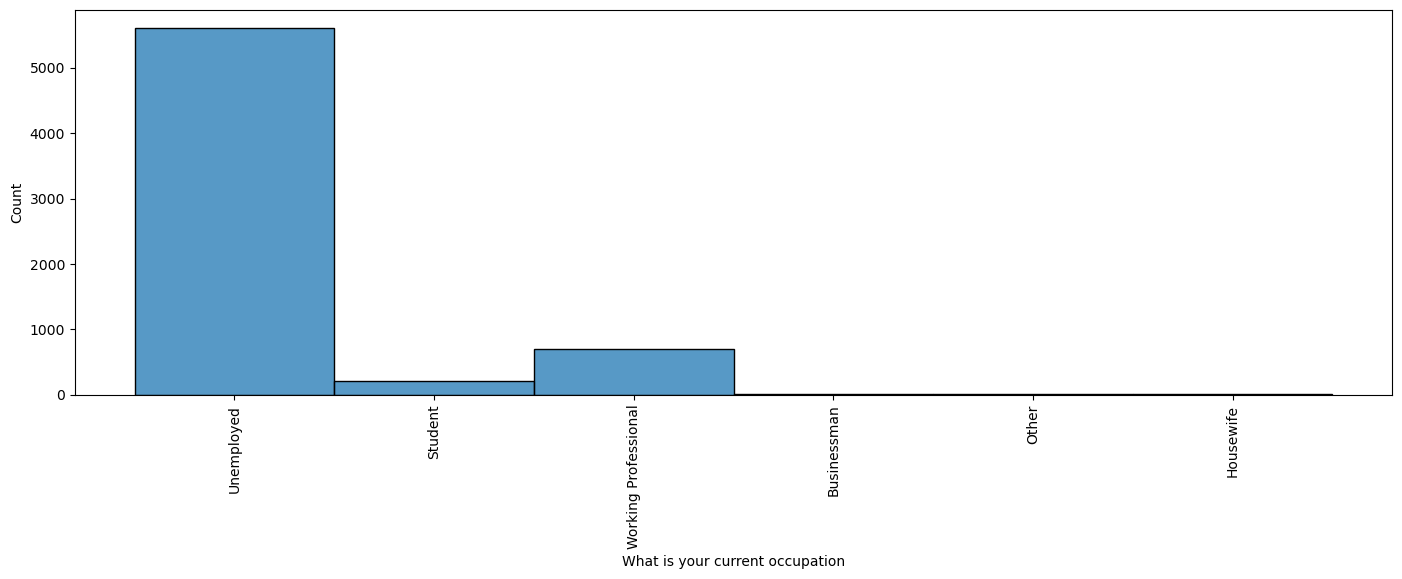

In [2316]:
missing_data(lead_df['What is your current occupation'])

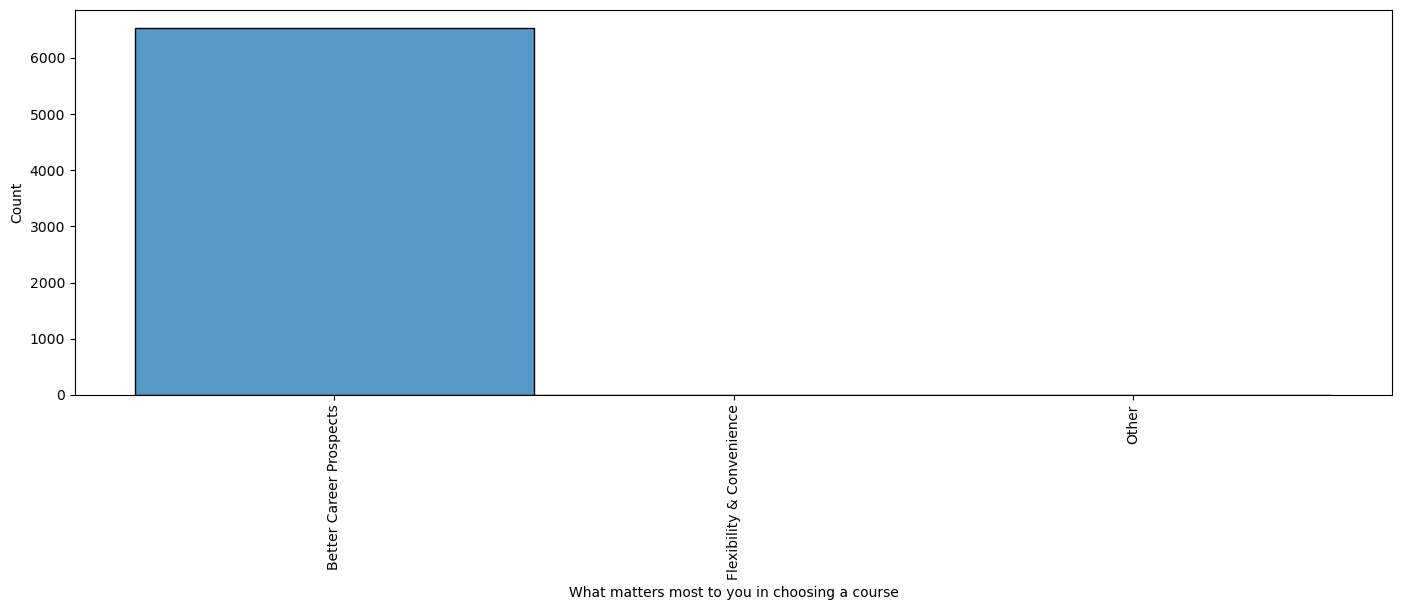

In [2317]:
missing_data(lead_df['What matters most to you in choosing a course'])

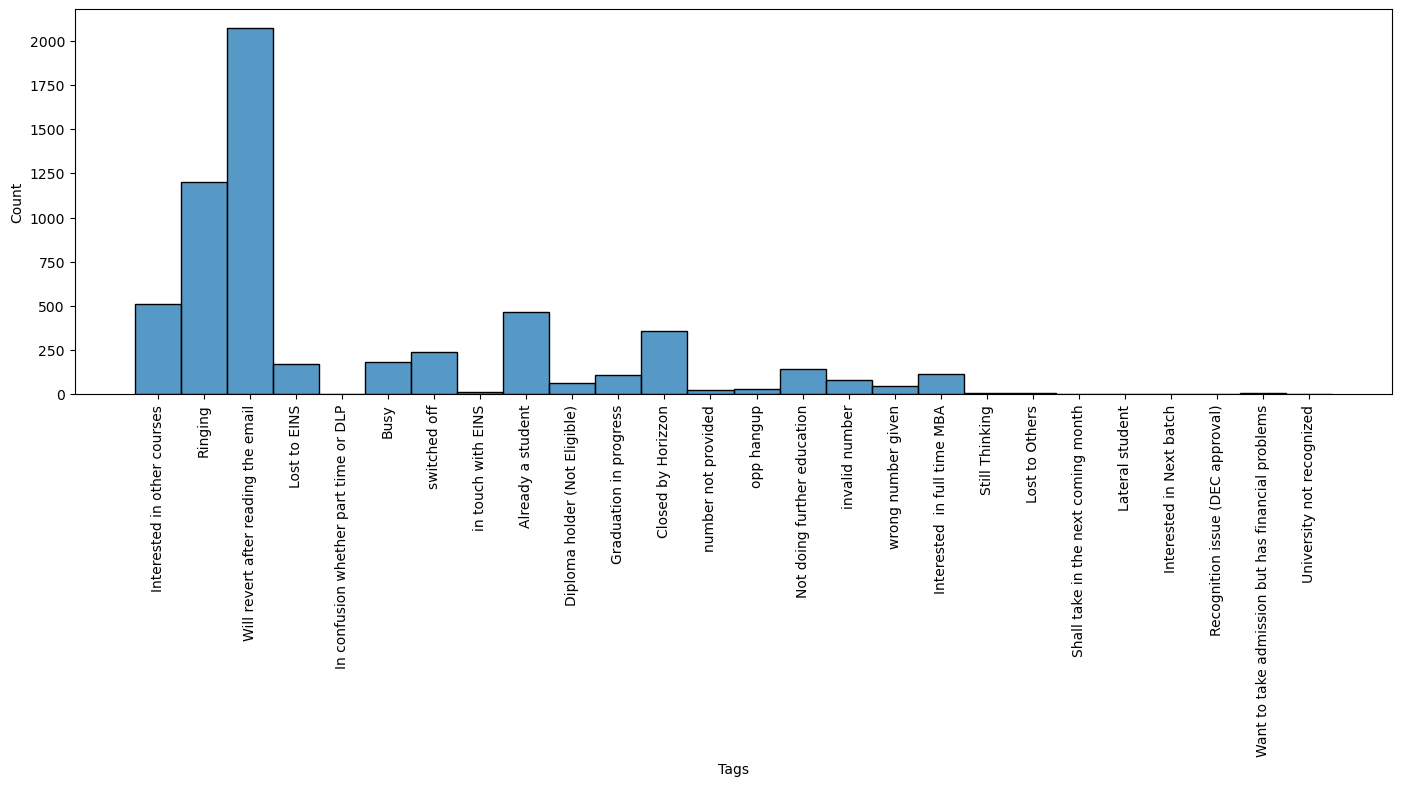

In [2318]:
missing_data(lead_df.Tags)

In [2319]:
lead_df.shape

(9240, 29)

In [2320]:
# dropping columns

lead_df.drop(['Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
lead_df.shape

(9240, 26)

In [2321]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                              36.58
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [2322]:
# check missing value 
missing_values_df = lead_df[lead_df['TotalVisits'].isnull()]
missing_values_df

Prospect ID  Lead Number    Lead Origin       Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit Last Activity                     Specialization What is your current occupation Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses Update me on Supply Chain Content Get updates on DM Content I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
77    895d4905-f534-4f18-915b-8d239a72b5dc       659722  Lead Add Form  Welingak Website           No          No          1          NaN                         1096                   NaN           NaN                                NaN                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
79    3a0ce10f-d2c1-4213-a2bc-4f97bcd29699       659710  Lead Add Form         Reference           No          No          1          NaN                          705                   NaN           NaN             Hospitality Management            Working Professional     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
81    277ad6a6-4565-4a18-a1ff-e46e03f22663       659705  Lead Add Form  Welingak Website           No          No          1          NaN                          346                   NaN           NaN                                NaN                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
88    68f496c2-0073-470f-9c3c-7fb48f060ce5       659631  Lead Add Form         Reference           No          No          1          NaN                         1007                   NaN           NaN          Human Resource Management                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
120   144807db-2895-4002-b52e-3eda79c22395       659283  Lead Add Form         Reference           No          No          1          NaN                         1111                   NaN           NaN               Marketing Management            Working Professional     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
...                                    ...          ...            ...               ...          ...         ...        ...          ...                          ...                   ...           ...                                ...                             ...    ...      ...               ...                ...       ...                   ...                     ...                                    ...                               ...                       ...                                      ...                                 

In [2323]:
missing_values_df = lead_df[lead_df['Last Activity'].isnull()]
missing_values_df

Prospect ID  Lead Number    Lead Origin       Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit Last Activity                     Specialization What is your current occupation Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses Update me on Supply Chain Content Get updates on DM Content I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
77    895d4905-f534-4f18-915b-8d239a72b5dc       659722  Lead Add Form  Welingak Website           No          No          1          NaN                         1096                   NaN           NaN                                NaN                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
79    3a0ce10f-d2c1-4213-a2bc-4f97bcd29699       659710  Lead Add Form         Reference           No          No          1          NaN                          705                   NaN           NaN             Hospitality Management            Working Professional     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
81    277ad6a6-4565-4a18-a1ff-e46e03f22663       659705  Lead Add Form  Welingak Website           No          No          1          NaN                          346                   NaN           NaN                                NaN                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
88    68f496c2-0073-470f-9c3c-7fb48f060ce5       659631  Lead Add Form         Reference           No          No          1          NaN                         1007                   NaN           NaN          Human Resource Management                      Unemployed     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
120   144807db-2895-4002-b52e-3eda79c22395       659283  Lead Add Form         Reference           No          No          1          NaN                         1111                   NaN           NaN               Marketing Management            Working Professional     No       No                No                 No        No                    No                      No                                     No                                No                        No                                       No                                     No              Modified
...                                    ...          ...            ...               ...          ...         ...        ...          ...                          ...                   ...           ...                                ...                             ...    ...      ...               ...                ...       ...                   ...                     ...                                    ...                               ...                       ...                                      ...                                 

In [2324]:
# removing missing values
lead_df = lead_df.dropna(subset='TotalVisits')
lead_df = lead_df.dropna(subset='Lead Source')

In [2325]:
# Imputing values as per the above observations/insights

lead_df['What is your current occupation']=lead_df['What is your current occupation'].fillna(value='Unemployed')
lead_df['Specialization']=lead_df['Specialization'].fillna(value='Others')

In [2326]:
# Null value in %.
round(lead_df.isnull().sum()*100/lead_df['Prospect ID'].count(),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

##### Removing Unwanted Columns

These columns are of no use as they have only one category of response from customer and can be dropped:

In [2327]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns

cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']


lead_df.drop(cols_to_drop, axis = 1, inplace = True)

In [2328]:
lead_df.shape

(9074, 21)

NOTE: Columns such as:

* 'Prospect ID',
* 'Lead Number',
* 'Last Notable Activity'

Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [2329]:
# Dropping Columns

lead_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

In [2330]:
lead_df.shape

(9074, 18)

In [2331]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   object 
 

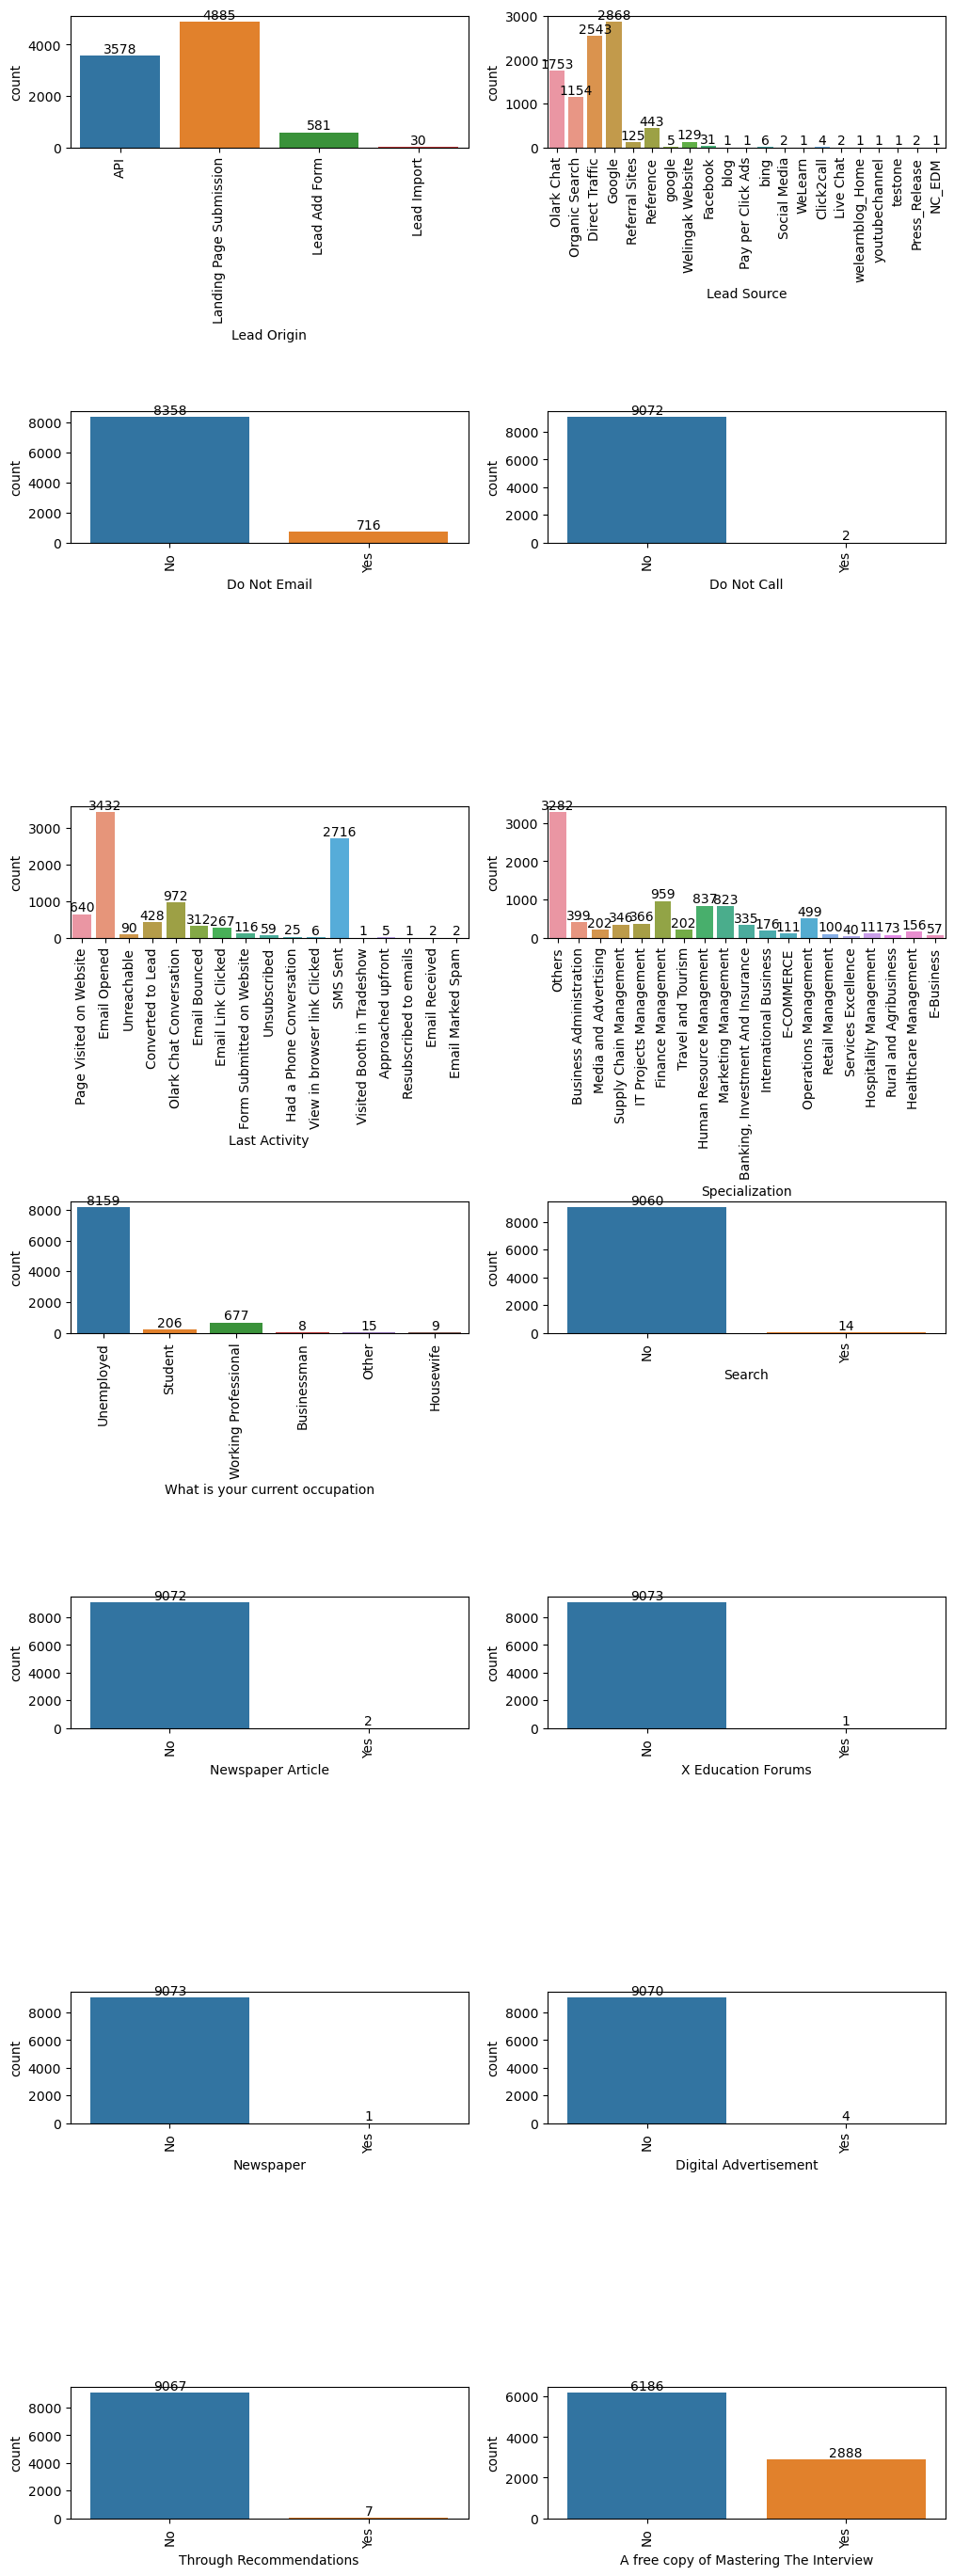

In [2332]:
# check remaining columns.
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

NOTE: Following columns have data which is highly skewed :

* 'Do Not Call',
* 'Search',
* 'Newspaper Article',
* 'X Education Forums',
* 'Newspaper',
* 'Digital Advertisement',
* 'Through Recommendations'.

These columns will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can lead to biased or inaccurate parameter estimates.

In [2333]:
# Dropping categorical columns with highly skewed data

lead_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",lead_df.shape)

After Drop:  (9074, 11)


##### Outliers

In [2334]:
# functions for ploting boxpolt

def get_outliers(data,columns):

    plt.figure(figsize=[20,10])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columns):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

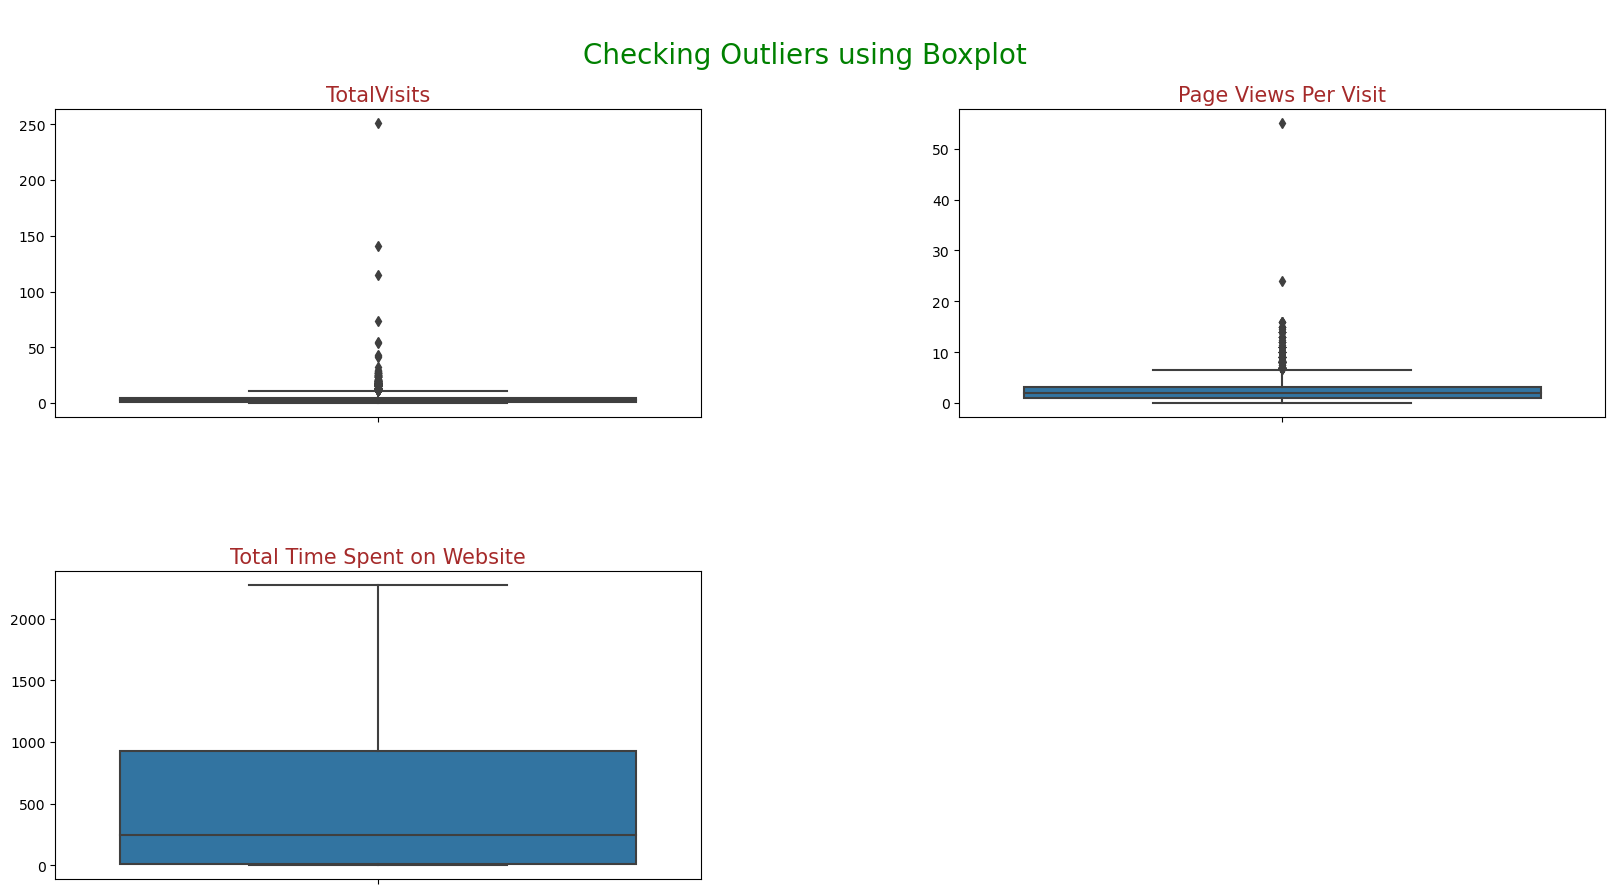

In [2335]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
get_outliers(lead_df,num_cols)

Observation : TotalVisits and PageViewsPerVista has outliers

#### Treatment of outliers

In [2336]:
# describe data in different percentiles.
lead_df.describe(percentiles=[.25,.50,.70,.75,.80,.90,.93,.95])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000  9074.000000                  9074.000000           9074.000000
mean      0.378554     3.456028                   482.887481              2.370151
std       0.485053     4.858802                   545.256560              2.160871
min       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     1.000000                    11.000000              1.000000
50%       0.000000     3.000000                   246.000000              2.000000
70%       1.000000     4.000000                   693.000000              3.000000
75%       1.000000     5.000000                   922.750000              3.200000
80%       1.000000     5.000000                  1078.400000              4.000000
90%       1.000000     7.000000                  1373.000000              5.000000
93%       1.000000     8.000000                  1483.000000              5.000000
95%       1.000000    10.000000                  1557.000000              6.000000
max       1.000000   251.000000                  2272.000000             55.000000

In [2337]:
# remove outliers at percentile 95%

lead_df = lead_df[(lead_df['TotalVisits'] <= 10) & (lead_df['Page Views Per Visit'] <= 7) & (lead_df['Total Time Spent on Website'] <= 1995)]
lead_df.describe()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8552.000000  8552.000000                  8552.000000           8552.000000
mean      0.374065     2.813962                   466.476146              2.142405
std       0.483909     2.368245                   536.900764              1.741052
min       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                     0.000000              0.000000
50%       0.000000     3.000000                   233.000000              2.000000
75%       1.000000     4.000000                   885.000000              3.000000
max       1.000000    10.000000                  1995.000000              7.000000

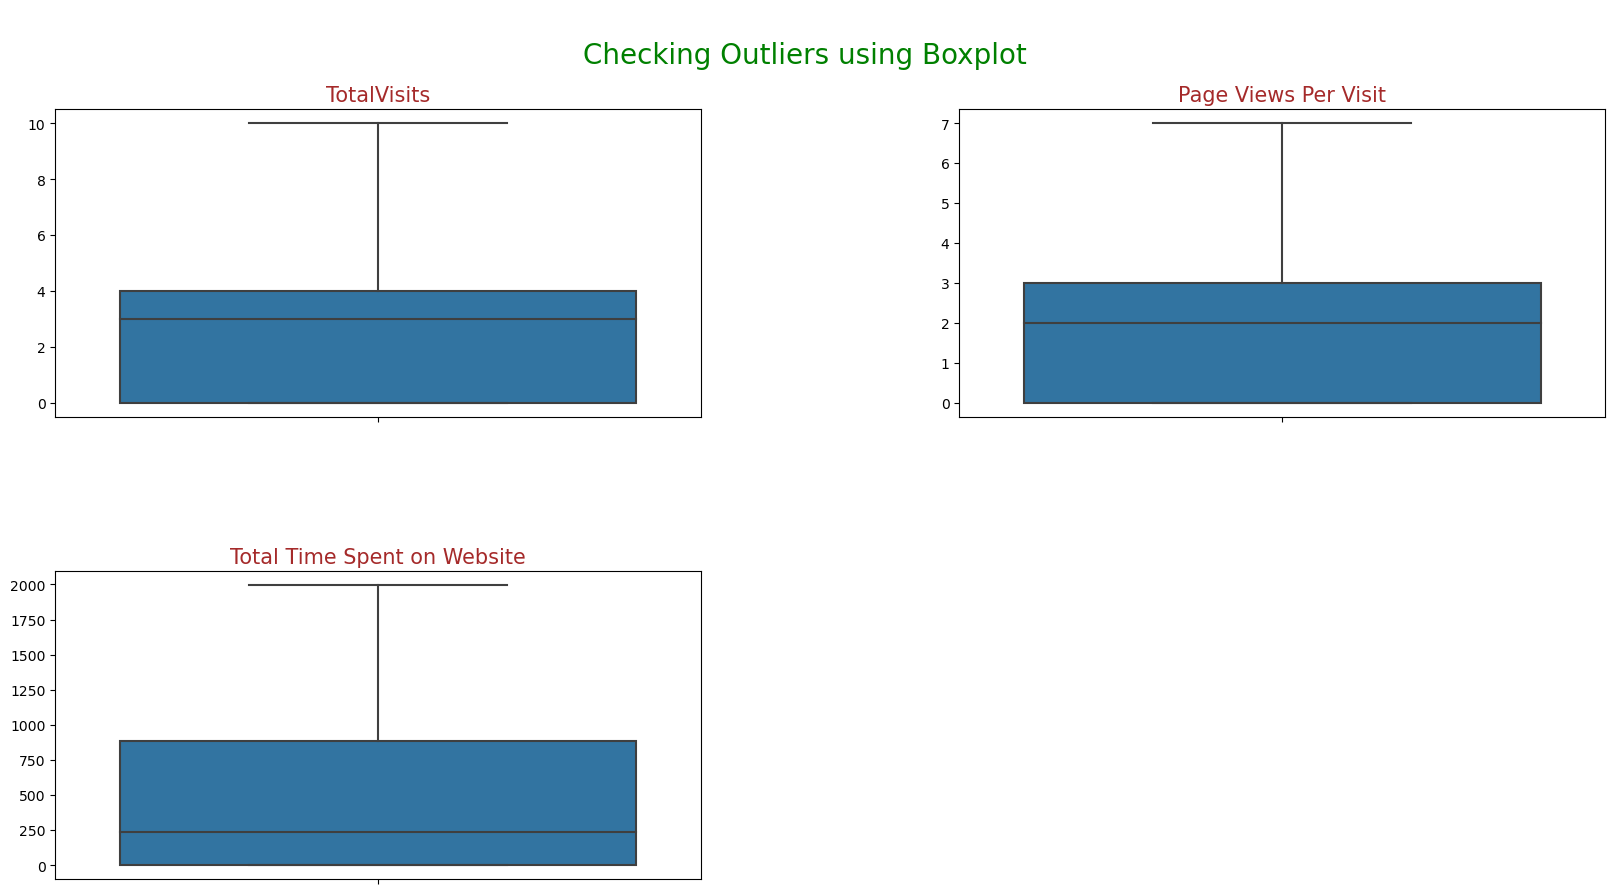

In [2338]:
get_outliers(lead_df,num_cols)

In [2339]:
# after outlier treatment detailed percentile values
lead_df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8552.000000  8552.000000                  8552.000000           8552.000000
mean      0.374065     2.813962                   466.476146              2.142405
std       0.483909     2.368245                   536.900764              1.741052
min       0.000000     0.000000                     0.000000              0.000000
10%       0.000000     0.000000                     0.000000              0.000000
25%       0.000000     0.000000                     0.000000              0.000000
50%       0.000000     3.000000                   233.000000              2.000000
75%       1.000000     4.000000                   885.000000              3.000000
95%       1.000000     7.000000                  1535.450000              5.000000
max       1.000000    10.000000                  1995.000000              7.000000

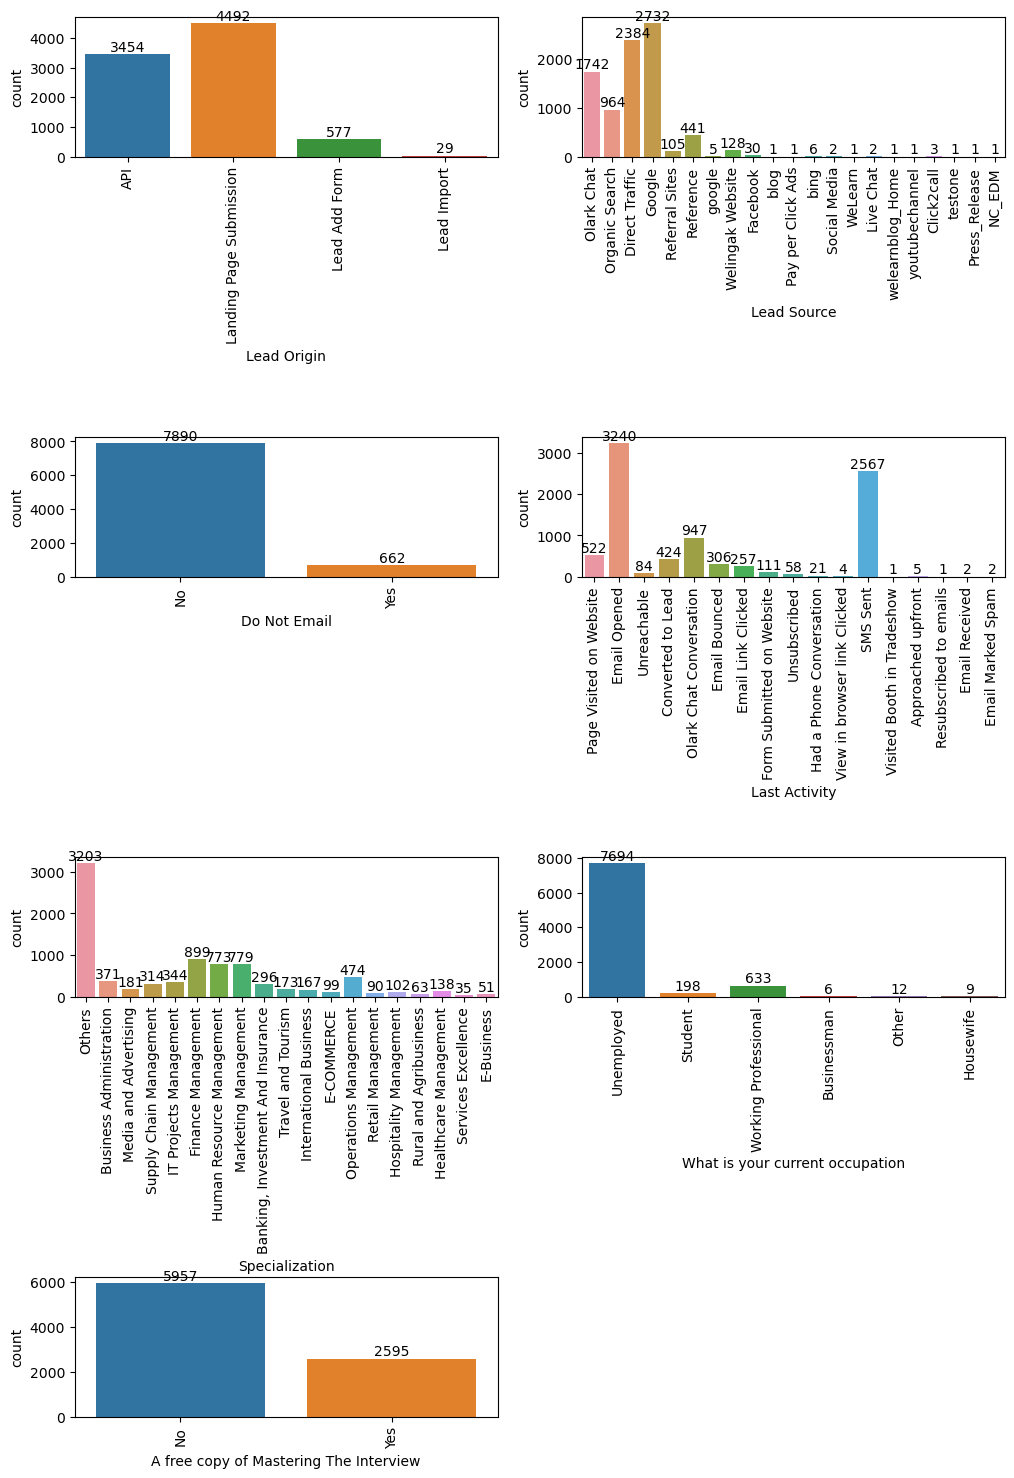

In [2340]:
# check remaining columns.
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = lead_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=lead_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

In [2341]:
# Changing google to Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace("google","Google")


# # Grouping low frequency value levels to Others
# lead_df['Lead Source'] = lead_df['Lead Source'].replace(["bing","Click2call","Press_Release",
#                                                            "Social Media","Live Chat","youtubechannel",
#                                                            "testone","Pay per Click Ads","welearnblog_Home",
#                                                            "WeLearn","blog","NC_EDM"],"Others")



In [2342]:
# value_counts percentage after replace
lead_df["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google               32.004210
Direct Traffic       27.876520
Olark Chat           20.369504
Organic Search       11.272217
Reference             5.156688
Welingak Website      1.496726
Referral Sites        1.227783
Facebook              0.350795
bing                  0.070159
Click2call            0.035080
Social Media          0.023386
Live Chat             0.023386
Pay per Click Ads     0.011693
blog                  0.011693
WeLearn               0.011693
welearnblog_Home      0.011693
youtubechannel        0.011693
testone               0.011693
Press_Release         0.011693
NC_EDM                0.011693
Name: proportion, dtype: float64

In [2343]:
# Grouping low frequency value levels to Others 
# lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
#                                                                'Had a Phone Conversation', 
#                                                                'Approached upfront',
#                                                                'View in browser link Clicked',       
#                                                                'Email Marked Spam',                  
#                                                                'Email Received','Visited Booth in Tradeshow',
#                                                                'Resubscribed to emails'],'Others')

In [2344]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8552 non-null   object 
 1   Lead Source                             8552 non-null   object 
 2   Do Not Email                            8552 non-null   object 
 3   Converted                               8552 non-null   int64  
 4   TotalVisits                             8552 non-null   float64
 5   Total Time Spent on Website             8552 non-null   int64  
 6   Page Views Per Visit                    8552 non-null   float64
 7   Last Activity                           8552 non-null   object 
 8   Specialization                          8552 non-null   object 
 9   What is your current occupation         8552 non-null   object 
 10  A free copy of Mastering The Interview  8552 non-null   object 
d

In [2345]:
# Renaming column name to "Interview_copy" from "A free copy of Mastering The Interview"
lead_df.rename(columns={'A free copy of Mastering The Interview': 'Interview Copy'}, inplace=True)

# Renaming column name to "occupation" from "What is your current occupationA free copy of Mastering The Interview"
lead_df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

# Renaming column name to "Spend_Website" from "Total Time Spent on Website"
lead_df.rename(columns={'Total Time Spent on Website': 'Spend Website'}, inplace=True)

# Renaming column name to "Page_Visit" from "Page Views Per Visit"
lead_df.rename(columns={'Page Views Per Visit': 'Page Visit'}, inplace=True)

In [2346]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lead Origin     8552 non-null   object 
 1   Lead Source     8552 non-null   object 
 2   Do Not Email    8552 non-null   object 
 3   Converted       8552 non-null   int64  
 4   TotalVisits     8552 non-null   float64
 5   Spend Website   8552 non-null   int64  
 6   Page Visit      8552 non-null   float64
 7   Last Activity   8552 non-null   object 
 8   Specialization  8552 non-null   object 
 9   Occupation      8552 non-null   object 
 10  Interview Copy  8552 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 801.8+ KB


In [2347]:
# convert datatype od Do Not Email and Interview copy (Yes 1 / NO 0)


lead_df['Do Not Email'] = lead_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

lead_df['Interview Copy'] = lead_df['Interview Copy'].apply(lambda x: 1 if x =='Yes' else 0)


In [2348]:
# data type
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lead Origin     8552 non-null   object 
 1   Lead Source     8552 non-null   object 
 2   Do Not Email    8552 non-null   int64  
 3   Converted       8552 non-null   int64  
 4   TotalVisits     8552 non-null   float64
 5   Spend Website   8552 non-null   int64  
 6   Page Visit      8552 non-null   float64
 7   Last Activity   8552 non-null   object 
 8   Specialization  8552 non-null   object 
 9   Occupation      8552 non-null   object 
 10  Interview Copy  8552 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 801.8+ KB


#### Step 3 Data Analysis

##### Univariate Analysis

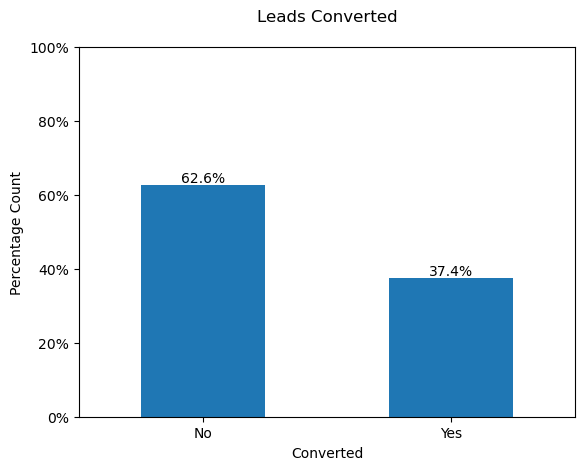

In [2349]:
ax =(100*lead_df["Converted"].value_counts(normalize=True)).plot.bar()


plt.title("Leads Converted\n")
plt.xlabel('Converted')
plt.ylabel("Percentage Count")

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [2350]:
#List of categorical columns
cat_cols = ["Lead Origin","Occupation","Do Not Email",
            "Interview Copy","Lead Source","Last Activity","Specialization"]



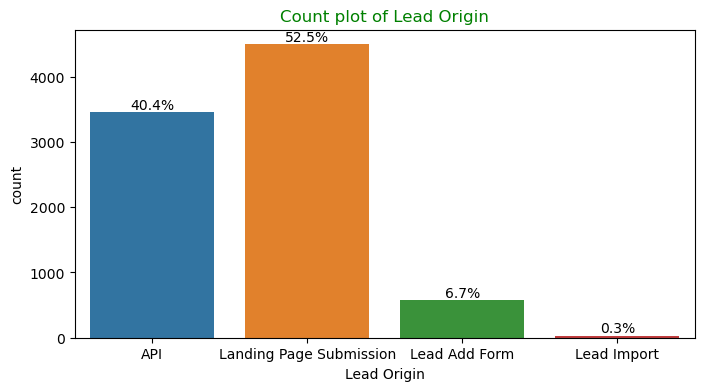

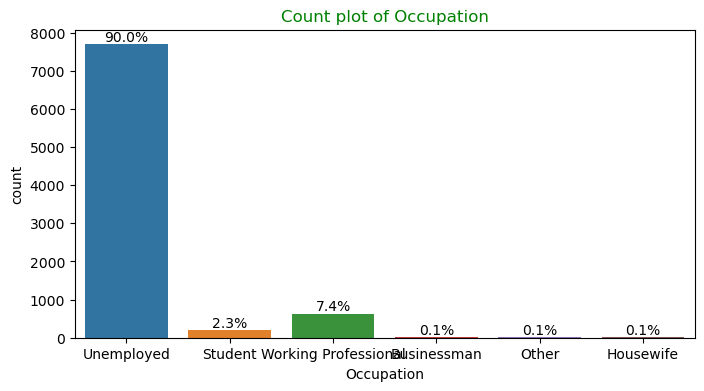

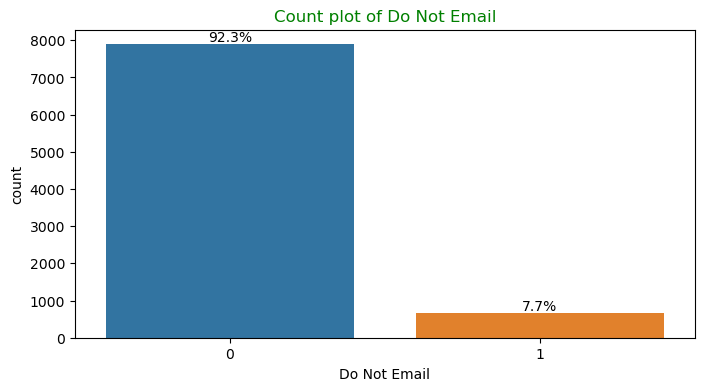

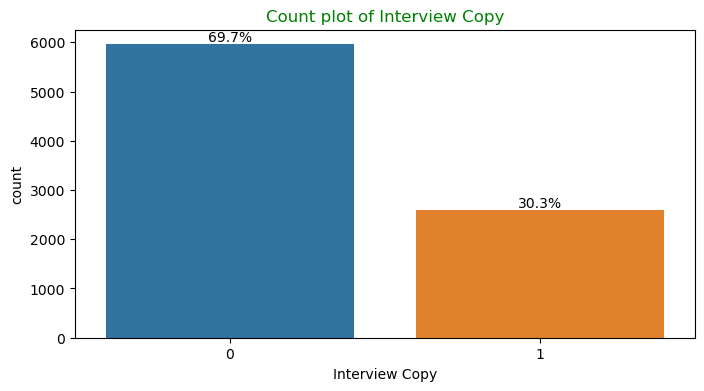

In [2351]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[8,4])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=lead_df)
    total=len(lead_df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

Observation

In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

With this we get some understanding that which variables can be used in Bivariate analysis.

Insights Univariate:
Here is the list of features from variables which are present in majority (Converted and Not Converted included)

* Lead Origin: "Landing Page Submission" identified 52.5% customers, "API" identified 40.4%.

* Occupation: It has 90% of the customers as Unemployed

* Do Not Email: 92.3% of the people has opted that they dont want to be emailed about the course.

* Interview Copy:  69.7 % customers wants copy.


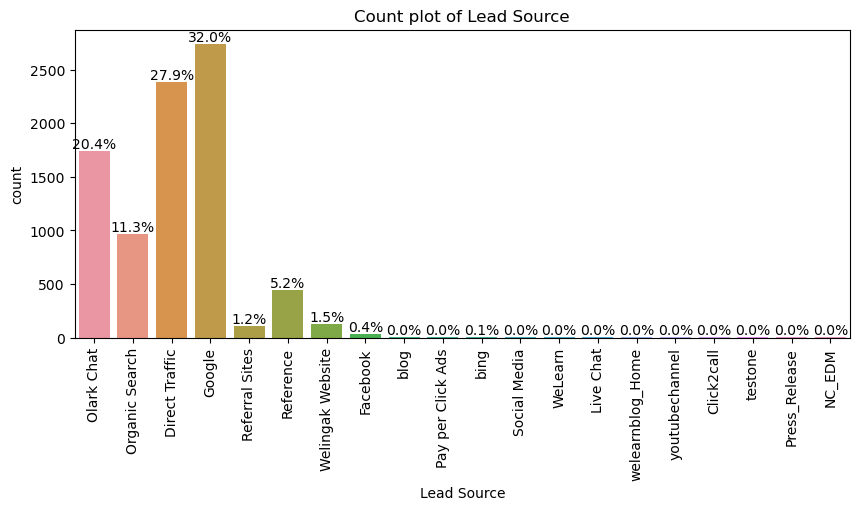

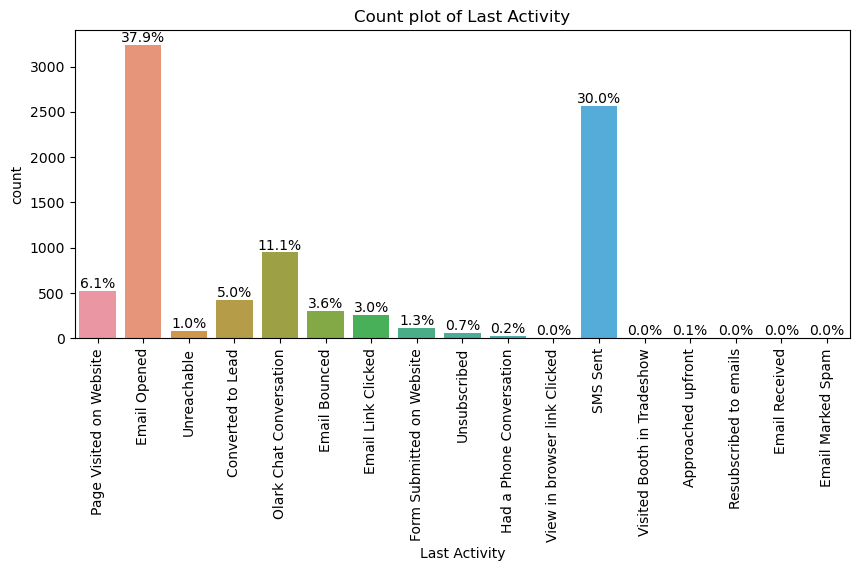

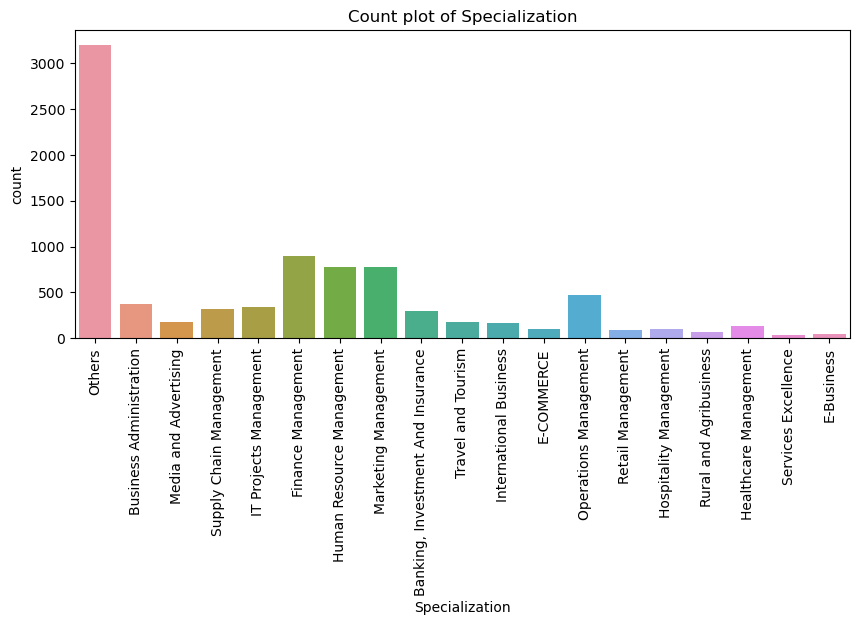

In [2352]:
# for Lead Source","Last Activity","Specialization"
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,4])
    plt.title("Count plot of {}".format(i))
    ax=sns.countplot(x=i,data=lead_df)
    total=len(lead_df[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

* Lead Source: 58% Lead source is from Google & Direct Traffic combined


* Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

#### Bivariate Analysis

Analysis between 2 variables

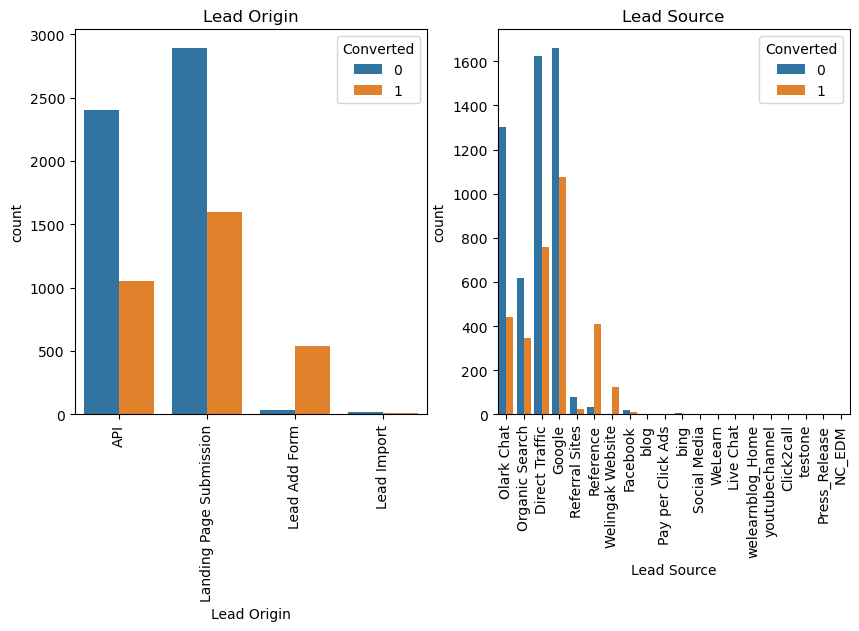

In [2353]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data=lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data=lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

In [2354]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=lead_df,palette="prism_r",alpha=0.46)
    
    total=len(lead_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [2355]:
# # Bivariate Analysis for all these variables using loop and UDF
# # Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
# cat_cols = ["Lead Origin","Occupation","Do Not Email",
#             "Lead Source","Last Activity","Specialization","Interview Copy"]

# for i in cat_cols:
#     Bivariate_cat(lead_df,variable_name=i)
    

C:\Users\vipin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x400 with 0 Axes>

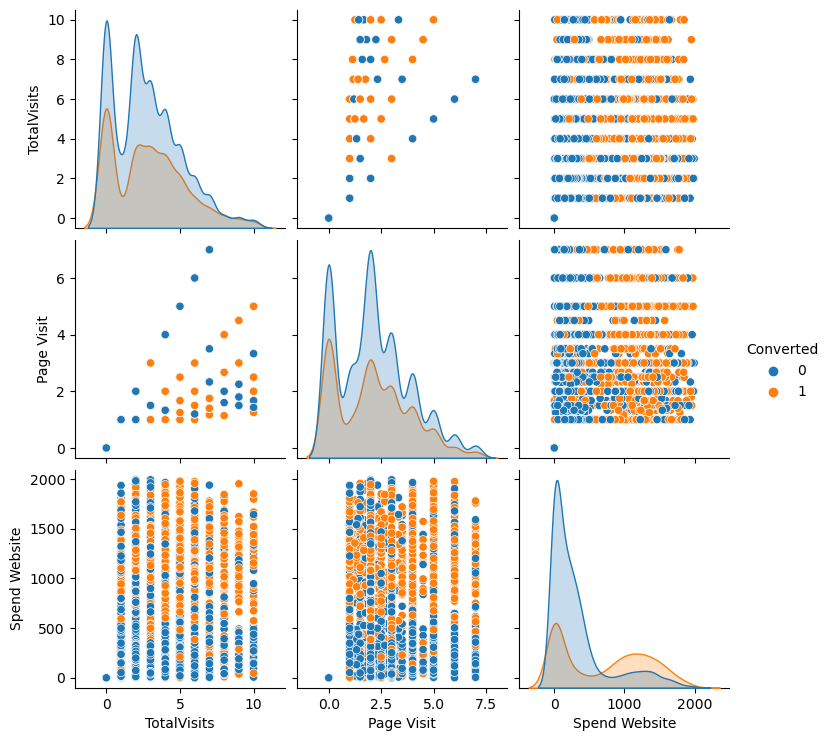

In [2356]:
num_cols = ["TotalVisits","Page Visit","Spend Website"]

plt.figure(figsize=(16, 4))
sns.pairplot(data=lead_df,vars=num_cols,hue="Converted")                                  
plt.show()

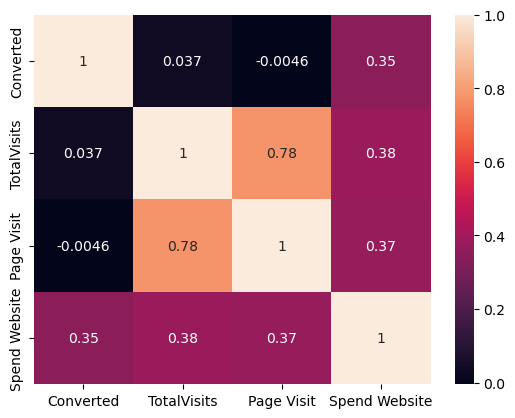

In [2357]:
num_cols = ["Converted","TotalVisits","Page Visit","Spend Website"]

# Heatmap to show correlation between numerical variables
sns.heatmap(data=lead_df[num_cols].corr(),annot=True)
plt.show()

#### Data Preparation

In [2358]:
lead_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  TotalVisits  Spend Website  Page Visit            Last Activity           Specialization  Occupation  Interview Copy
0                      API      Olark Chat             0          0          0.0              0         0.0  Page Visited on Website                   Others  Unemployed               0
1                      API  Organic Search             0          0          5.0            674         2.5             Email Opened                   Others  Unemployed               0
2  Landing Page Submission  Direct Traffic             0          1          2.0           1532         2.0             Email Opened  Business Administration     Student               1
3  Landing Page Submission  Direct Traffic             0          0          1.0            305         1.0              Unreachable    Media and Advertising  Unemployed               0
4  Landing Page Submission          Google             0          1          2.0           1428         1.0        Converted to Lead                   Others  Unemployed               0

In [2359]:
# creating dummy variable for categorical variables and dropping the first one.
lead_df = pd.get_dummies(data=lead_df,columns=["Lead Origin","Lead Source","Last Activity","Specialization","Occupation"], drop_first=True,dtype='int')


In [2360]:
lead_df.shape

(8552, 67)

In [2361]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8552 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Do Not Email                                8552 non-null   int64  
 1   Converted                                   8552 non-null   int64  
 2   TotalVisits                                 8552 non-null   float64
 3   Spend Website                               8552 non-null   int64  
 4   Page Visit                                  8552 non-null   float64
 5   Interview Copy                              8552 non-null   int64  
 6   Lead Origin_Landing Page Submission         8552 non-null   int32  
 7   Lead Origin_Lead Add Form                   8552 non-null   int32  
 8   Lead Origin_Lead Import                     8552 non-null   int32  
 9   Lead Source_Direct Traffic                  8552 non-null   int32  
 10  Lead Source_Faceb

#### split data

In [2362]:
# split data in y an x
y = lead_df.pop('Converted')
x = lead_df

In [2363]:
# shape of x and y
print(y.shape)
print(x.shape)

(8552,)
(8552, 66)


In [2364]:
# split data in % 70:30.
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=100)

In [2365]:
# after split
print(X_train.shape)
print(X_test.shape)

(5986, 66)
(2566, 66)


#### Featuring 

Using Standard scaler for scaling the features,
Good if we have some outliers

In [2366]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
X_train.head()

Do Not Email  TotalVisits  Spend Website  Page Visit  Interview Copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Pay per Click Ads  Lead Source_Press_Release  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  Lead Source_testone  Lead Source_welearnblog_Home  Lead Source_youtubechannel  Last Activity_Converted to Lead  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  Last Activity_Email Opened  Last Activity_Email Received  Last Activity_Form Submitted on Website  Last Activity_Had a Phone Conversation  Last Activity_Olark Chat Conversation  Last Activity_Page Visited on Website  \
1374             0          6.0           1552         1.5               1                                    0                          0                        0                           0                     0                   1                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0   
2007             0          2.0            568         2.0               1                                    1                          0                        0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      0   
3354             0          0.0              0         0.0               0                                    0                          0                        0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                    0                             0                           0                                0                            0                                 1                                0                           0                             0                                        0                                       0                                      0                                      0   
5635             0          0.0              0         0.0               0                

In [2367]:
# scaler
scaler = StandardScaler()
X_train[['Do Not Email','TotalVisits','Spend Website','Page Visit']]=scaler.fit_transform(X_train[['Do Not Email','TotalVisits','Spend Website','Page Visit']])
X_train.head()

Do Not Email  TotalVisits  Spend Website  Page Visit  Interview Copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Pay per Click Ads  Lead Source_Press_Release  Lead Source_Reference  Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  Lead Source_testone  Lead Source_welearnblog_Home  Lead Source_youtubechannel  Last Activity_Converted to Lead  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  Last Activity_Email Opened  Last Activity_Email Received  Last Activity_Form Submitted on Website  Last Activity_Had a Phone Conversation  Last Activity_Olark Chat Conversation  Last Activity_Page Visited on Website  \
1374     -0.291902     1.354030       2.010683   -0.364032               1                                    0                          0                        0                           0                     0                   1                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                    0                             0                           0                                0                            0                                 0                                0                           1                             0                                        0                                       0                                      0                                      0   
2007     -0.291902    -0.335878       0.187622   -0.075766               1                                    1                          0                        0                           1                     0                   0                      0                   0                       0                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                    0                             0                           0                                0                            0                                 0                                0                           0                             0                                        0                                       0                                      0                                      0   
3354     -0.291902    -1.180832      -0.864714   -1.228830               0                                    0                          0                        0                           0                     0                   0                      0                   0                       1                           0                              0                          0                      0                           0                         0                    0                             0                 0                 0                    0                             0                           0                                0                            0                                 1                                0                           0                             0                                        0                                       0                                      0                                      0   
5635     -0.291902    -1.180832      -0.864714   -1.228830               0                

In [2368]:
lcr = y.sum()/len(y)*100
lcr

37.40645463049579

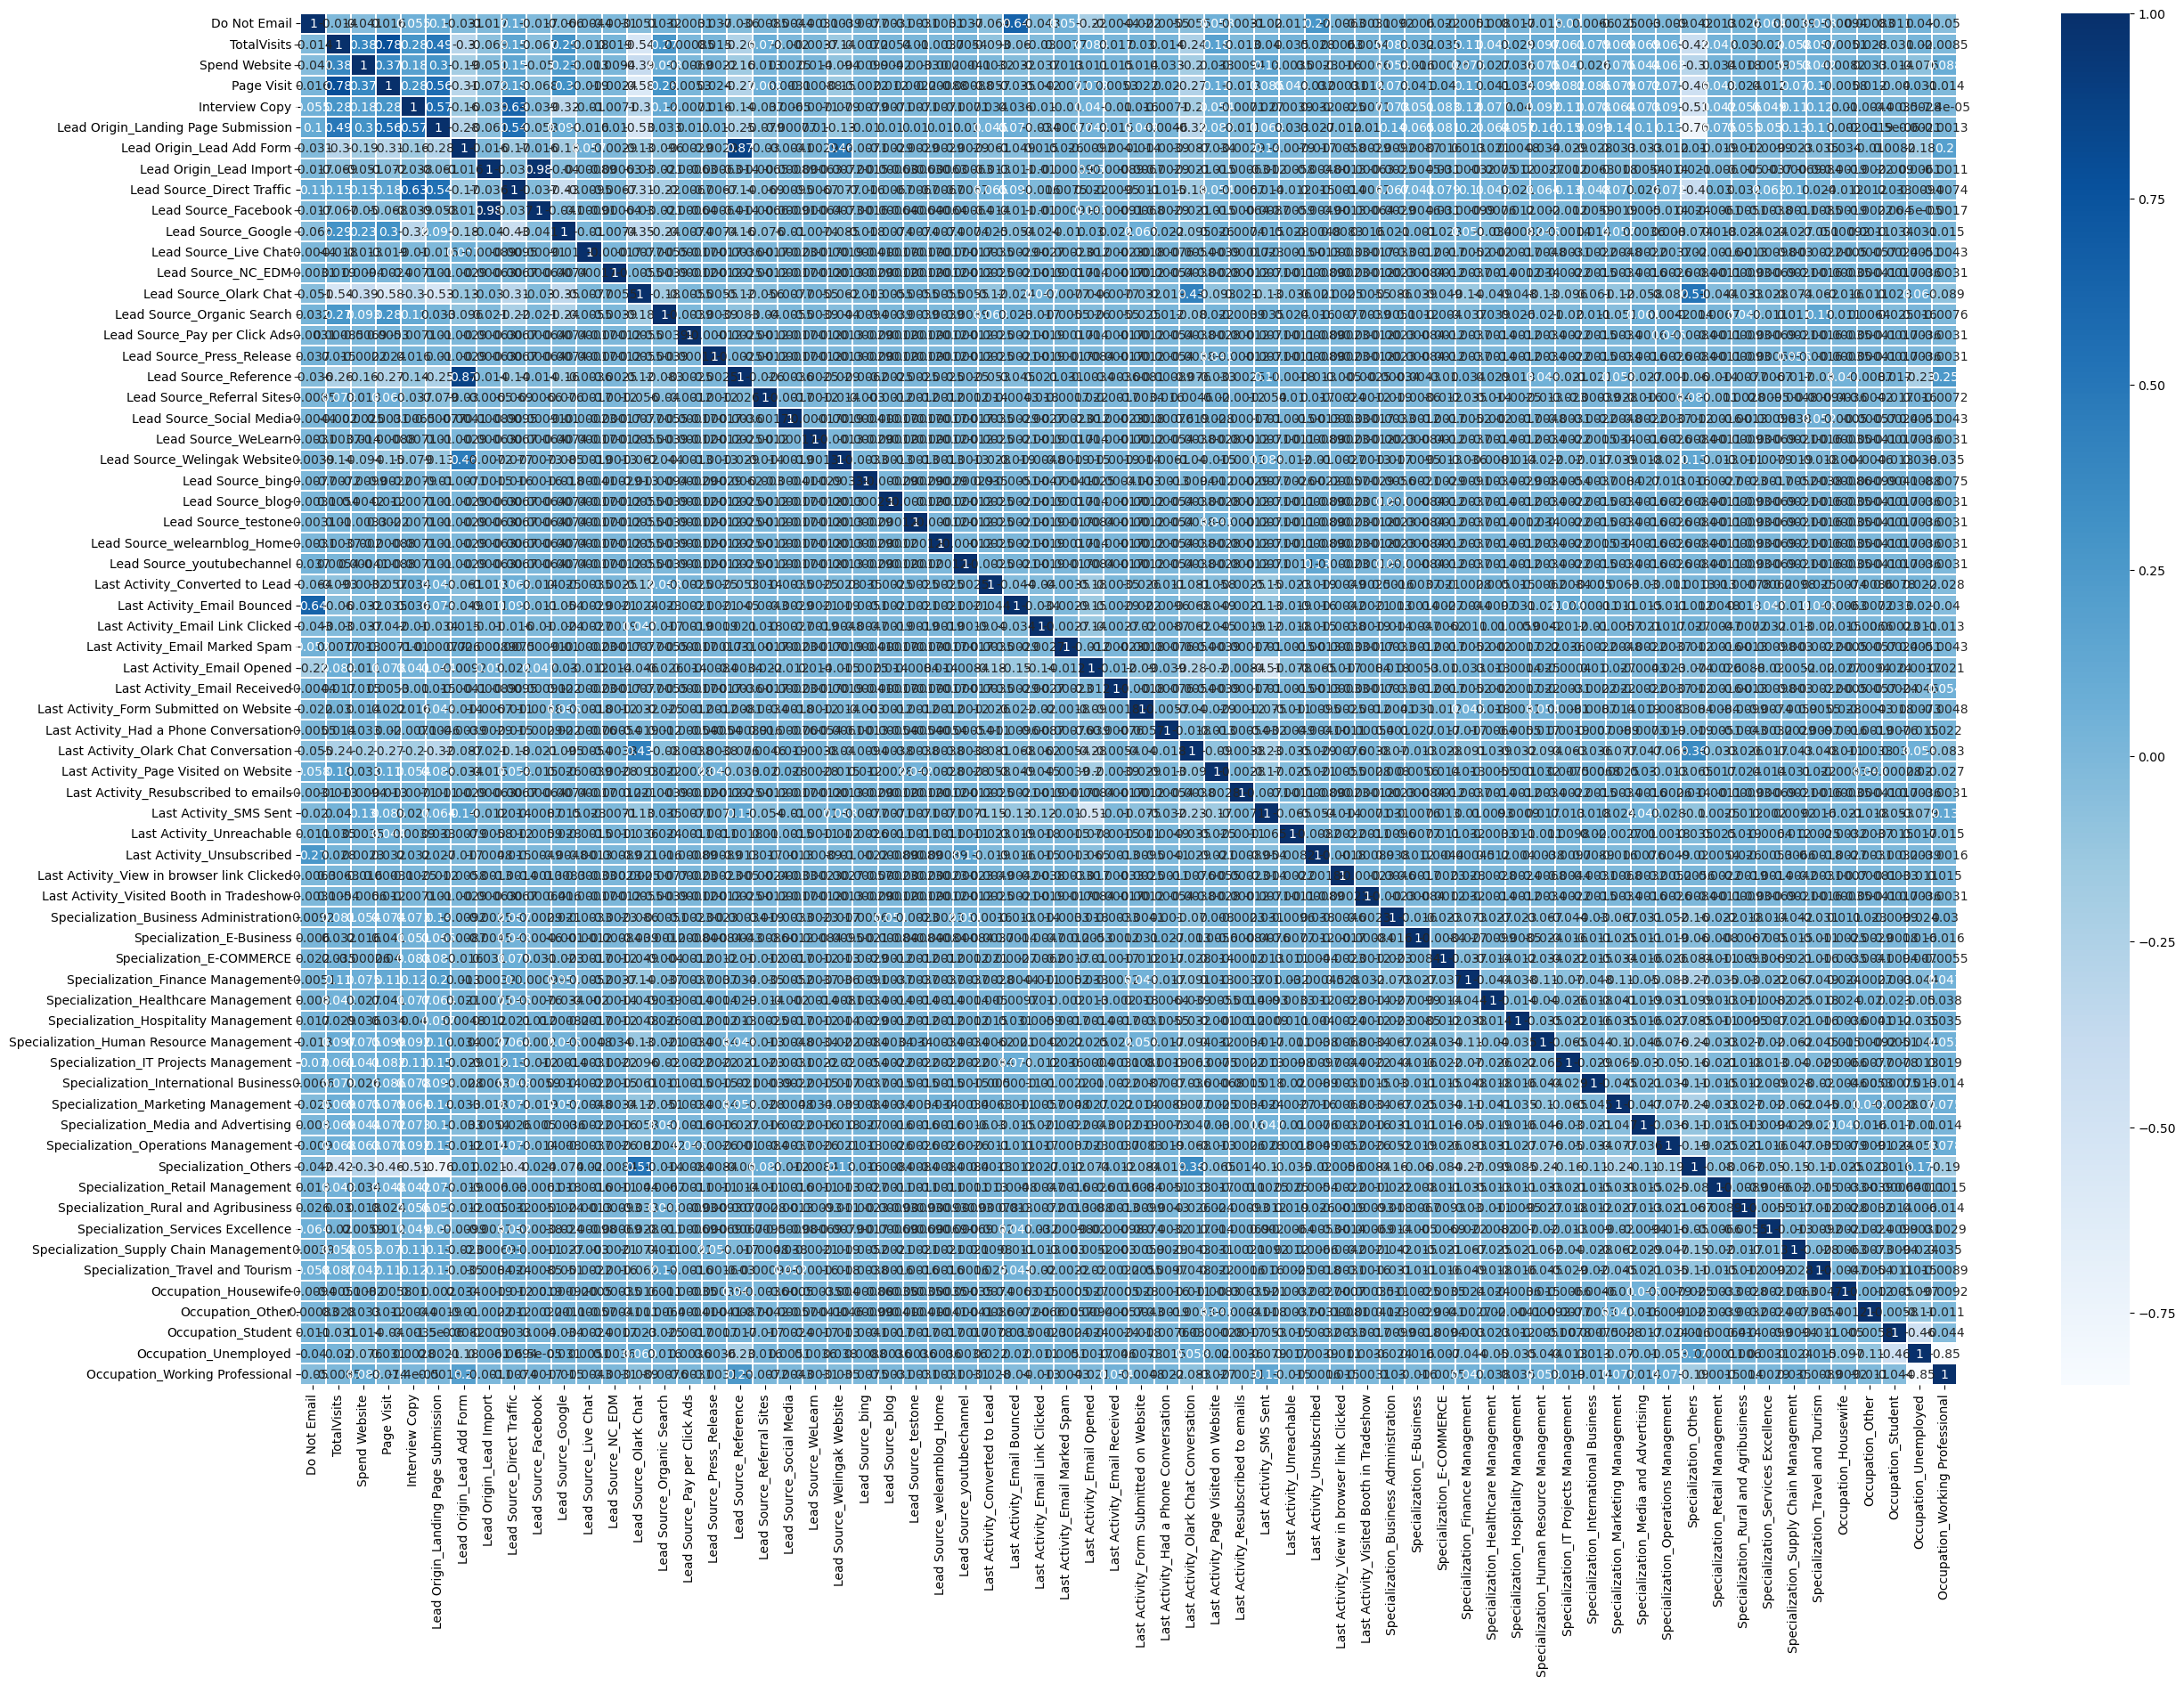

In [2369]:
# analyse correlation matrix
plt.figure(figsize = (30,20))        
sns.heatmap(lead_df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

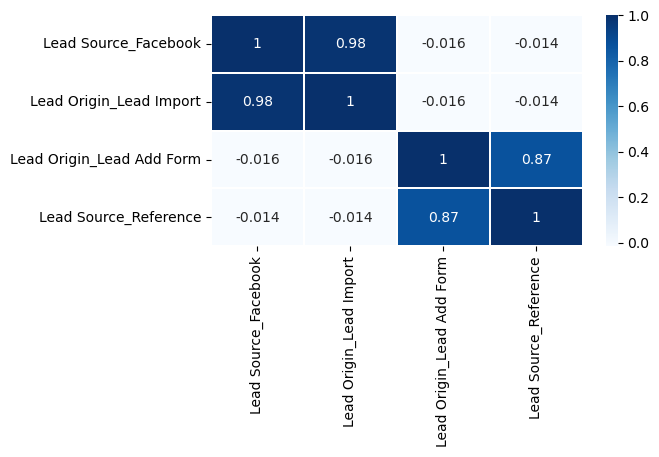

In [2370]:
plt.figure(figsize = (6,3))        
sns.heatmap(lead_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

Observation:
    
    High correlation between 2 columns so droping one.

In [2371]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

#### Model Building